# Bitacora para el manejo de secuencias fasta y busqueda basica de *Blastn*


## Para el siguiente ejercicio es necesario tener el Blast+ instalado en la computadora
https://www.ncbi.nlm.nih.gov/guide/data-software/
## y tener instalada las bases de datos 16s microbiano de taxonomica

In [1]:
ls ~/Desktop/bigdata/16SMicrobial/

16SMicrobial.nhr  16SMicrobial.nni  16SMicrobial.nsi  taxdb.btd
16SMicrobial.nin  16SMicrobial.nog  16SMicrobial.nsq  taxdb.bti
16SMicrobial.nnd  16SMicrobial.nsd  16SMicrobial.tar


In [2]:
pwd

'/home/user1/Desktop/jupyter'

In [3]:
cd ../data/fasta/

/home/user1/Desktop/data/fasta


In [4]:
ls

img/              secuencias_anotadas.aln  secuencias_anotadas.fasta
secuencias.fasta  secuencias_anotadas.dnd  secuencias_comp.fas


In [5]:
!head secuencias.fasta

>Nav1.2F.seq
GTGCTTCGACTTCCCCCAATCATCTGTCCCACCTTCGGCGGCTGGCTCCATAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCAATTACAACCGATTCCAGCTTCACGCATTCAAGTTGCAAACTGCAATCCGAACTGAAAACAGATTTGTGGAATTGGCTTAACCTCCCGGTTTCCCTGCCCTTTGTTCTGTCCATTGTACCACGTGTGTACCCCAGGTCATAAGGGGCATGATGATTTGACGTCATCCCCATTCCCTCCAGTAA
>Nav1.2R.seq
TTATGCCATTTGACCTGGGCTACCACGTGCTACATGGACAGAACAAGGGCATCGAAACCGCGAGGTTAAGCCAATCCCACAAATCTGTTCTCAATTCGGATCGCAATCTGCAACTCGACTGCGTGAAGCTGGAATCGCTAGTAATCGCGGATCAGCATGCCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCACGAGAGTTTGTAACACCCGAAGTCGGTGAGGTAACCTTTATGGAGCCAGCCGCCGAAGGTGGGACAGATGATTGGGGTGAAGTCGTAACAAGGTAGCCGTATCGGAAGGTGCGGTAAACCCCCCTCCTA
>Nav1.8F.seq
NGATTTTGGCTACGACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAACTTCATGTAGGCGAGTTGCAGCCTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCC

In [6]:
# cuantas secuencias hay?
# utilice el comando de linux ">" para saber cuantas secuencias se tienen
!grep ">" secuencias_comp.fas |wc -l

10


# Blastn

## Revise el manual del Blast y describa qué realizan los siguientes comandos y describalos en las siguientes celdas
https://www.ncbi.nlm.nih.gov/books/NBK279690/

en pdf

https://www.ncbi.nlm.nih.gov/books/NBK279690/pdf/Bookshelf_NBK279690.pdf


In [7]:
%%bash
export BLASTDB=~/Desktop/bigdata/16SMicrobial/
date  
blastn -query secuencias_comp.fas -db ~/Desktop/bigdata/16SMicrobial/16SMicrobial \
-out secuencias.tab -evalue 1E-6 -max_target_seqs 1 \
-num_threads 2 -outfmt "6 std sskingdoms stitle staxids sscinames scomnames sblastnames" 
date

Sat Aug 18 00:49:48 UTC 2018
Sat Aug 18 00:49:50 UTC 2018


### Revise el manual del Blast y describa qué valores obtendrá en el archivo de salida
busque '-outfmt'

In [10]:
ls 

img/              secuencias_anotadas.aln    secuencias_borrar.tab
secuencias.fasta  secuencias_anotadas.dnd    secuencias_comp.fas
secuencias.tab    secuencias_anotadas.fasta  secuencias_especies.csv


In [11]:
!head secuencias.tab

Nav1_2	NR_115063.1	95.808	334	13	1	1	333	1187	1520	7.03e-153	538	Bacteria	Bacillus halotolerans strain DSM 8802 16S ribosomal RNA, partial sequence	260554	[Brevibacterium] halotolerans	[Brevibacterium] halotolerans	firmicutes
Nav1_8	NR_025241.1	98.799	333	3	1	1	332	1173	1505	5.30e-169	592	Bacteria	Bacillus aquimaris strain TF-12 16S ribosomal RNA gene, partial sequence	189382	Bacillus aquimaris	Bacillus aquimaris	firmicutes
Nav2_2	NR_148756.1	100.000	333	0	0	1	333	1180	1512	3.16e-176	616	Bacteria	Alteromonas mediterranea strain DE 16S ribosomal RNA, complete sequence	314275	Alteromonas macleodii str. 'Deep ecotype'	Alteromonas macleodii str. 'Deep ecotype'	g-proteobacteria
PET1_2	NR_074812.1	97.598	333	8	0	1	333	1183	1515	6.93e-163	571	Bacteria	Hahella chejuensis strain KCTC 2396 16S ribosomal RNA, complete sequence	158327	Hahella chejuensis	Hahella chejuensis	g-proteobacteria
PET1_8	NR_152090.1	100.000	318	0	0	1	318	1178	1495	6.88e-168	588	Bacteria	Pseudomonas oceani strain DSM 100277

## se requiere visualizar los datos, para ello se utiliza el manejo de bases de datos que tiene Python

### se cargan la paquetería correspondientes

In [15]:
from pandas import Series, DataFrame
import pandas as pd
from Bio import SeqIO, AlignIO, SeqRecord

###  Blast da los resultados sin nombre de columnas, por lo que se asignan a la variable "encabezado"

In [16]:
encabezado =("qseqid", "sseqid", "pident", "length", "mismatch", "gapopen","qstart", 
             "qend", "sstart","send", "evalue", "bitscore", "sskingdoms", "stitle", 
             "staxids", "sscinames", "scomnames", "sblastnames")

### Se lee el archivo de salida y se asigna a la variable "ftab", con ello se pueden ver los resultados

In [17]:
ftab=pd.read_table("secuencias.tab", header=None , names= encabezado)
ftab

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,sskingdoms,stitle,staxids,sscinames,scomnames,sblastnames
0,Nav1_2,NR_115063.1,95.808,334,13,1,1,333,1187,1520,7.030000e-153,538,Bacteria,Bacillus halotolerans strain DSM 8802 16S ribo...,260554,[Brevibacterium] halotolerans,[Brevibacterium] halotolerans,firmicutes
1,Nav1_8,NR_025241.1,98.799,333,3,1,1,332,1173,1505,5.300000e-169,592,Bacteria,Bacillus aquimaris strain TF-12 16S ribosomal ...,189382,Bacillus aquimaris,Bacillus aquimaris,firmicutes
2,Nav2_2,NR_148756.1,100.000,333,0,0,1,333,1180,1512,3.160000e-176,616,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
3,PET1_2,NR_074812.1,97.598,333,8,0,1,333,1183,1515,6.930000e-163,571,Bacteria,Hahella chejuensis strain KCTC 2396 16S riboso...,158327,Hahella chejuensis,Hahella chejuensis,g-proteobacteria
4,PET1_8,NR_152090.1,100.000,318,0,0,1,318,1178,1495,6.880000e-168,588,Bacteria,Pseudomonas oceani strain DSM 100277 16S ribos...,1708783,Pseudomonas sp. DSM 100277,Pseudomonas sp. DSM 100277,g-proteobacteria
5,PET2_2,NR_148756.1,100.000,333,0,0,1,333,1180,1512,3.160000e-176,616,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
6,PET2_8,NR_148756.1,99.700,333,1,0,1,333,1180,1512,1.470000e-174,610,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
7,PETsn1_2,NR_148756.1,100.000,333,0,0,1,333,1180,1512,3.160000e-176,616,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
8,PETsn1_8,NR_148756.1,99.401,334,1,1,1,334,1180,1512,6.860000e-173,604,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
9,PHBb1_2,NR_112983.1,100.000,311,0,0,1,311,1117,1427,4.980000e-164,575,Bacteria,Litoreibacter janthinus strain KMM 3842 16S ri...,670154,Litoreibacter janthinus,Litoreibacter janthinus,a-proteobacteria


### Describa que es lo que esta observando y qué puede decir de todas las secuencias 

### Podrían eliminarse algunas columnas? Cuál(es)?

# Qué ocurrirá su usa el comando `ftab.head()`?

In [ ]:
ftab.head()

### Con el fin de resumir la informacion se agruparan considerando el nombre cientifico (sscinames), contando el numero de casos en donde se encontro una asignacion

In [19]:
ftab1= ftab.groupby("sscinames")["qseqid"].count()
ftab1 = DataFrame(ftab1)
ftab1

,qseqid
sscinames,
Alteromonas macleodii str. 'Deep ecotype',5
Bacillus aquimaris,1
Hahella chejuensis,1
Litoreibacter janthinus,1
Pseudomonas sp. DSM 100277,1
[Brevibacterium] halotolerans,1


## para guardar esta informacion se utiliza pandas para guardarlo con formato csv (valores separados por comas)

In [20]:
ftab1.to_csv("secuencias_especies.csv")

In [21]:
ls

img/              secuencias_anotadas.aln    secuencias_borrar.tab
secuencias.fasta  secuencias_anotadas.dnd    secuencias_comp.fas
secuencias.tab    secuencias_anotadas.fasta  secuencias_especies.csv


### Que diferencia hay si solamente utiliza estos comandos?

In [22]:
ftab1= ftab.groupby("sscinames")["qseqid"].count()
ftab1

sscinames
Alteromonas macleodii str. 'Deep ecotype'    5
Bacillus aquimaris                           1
Hahella chejuensis                           1
Litoreibacter janthinus                      1
Pseudomonas sp. DSM 100277                   1
[Brevibacterium] halotolerans                1
Name: qseqid, dtype: int64

## cuál considera mas facil de leer?

## Para graficar los resultados se cargan las bibliotecas pylab y matplotlib
Ya vienen integrados con el python y no es necesario descargarlos. Si requiere información adicional:
https://matplotlib.org


In [23]:
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

## que hace al último comando?
`%matplotlib inline`

## para graficar 

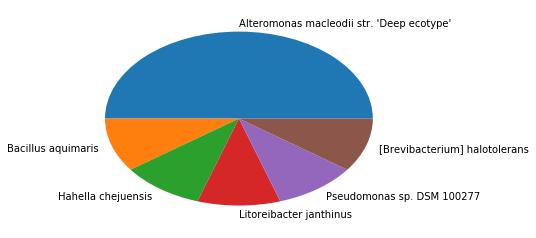

In [24]:
plt.pie(ftab1, labels=ftab1.index)
plt.show()

### revise el manual del plt.pi y modifique los comandos para que en la grafica se observen una de las rebanadas salida

In [25]:
?plt.pie

In [1]:
import os

In [5]:
os.makedirs('img',exist_ok=True)

In [6]:
?os.removedirs

save figure


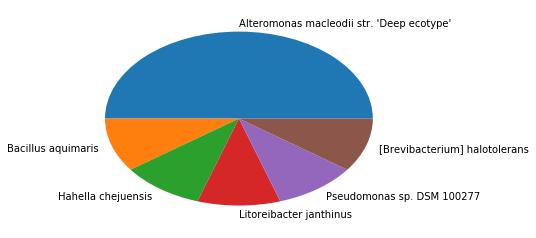

In [26]:
plt.pie(ftab1, labels=ftab1.index)
yes = input("save figure")
if yes.lower()=="y":
    plt.savefig('./img/secuencias_pie.png', 
                dpi=800, bbox_inches='tight')

plt.show()



### Si en vez de gráfica de pastel desea obtener una gráfica de barras use los siguientes comandos

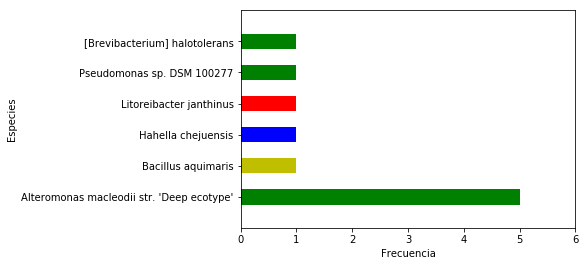

In [27]:
ftab1.plot(kind='barh', color=list('gybr'))
plt.axis([0, max (ftab1)+1, -1, len (ftab1.index)], label=None)
pylab.xlabel("Frecuencia")
pylab.ylabel("Especies")
plt.show()

#### Cómo modificaría el código anterior para guardar la gráfica como ./img/secuencias_barras.png 

In [28]:
ls ./img/

secuencias_pie.png


### describa lo que hacen las siguientes celdas

In [29]:
ftab2 = ftab1.sort_values( ascending=True)
ftab2


sscinames
Bacillus aquimaris                           1
Hahella chejuensis                           1
Litoreibacter janthinus                      1
Pseudomonas sp. DSM 100277                   1
[Brevibacterium] halotolerans                1
Alteromonas macleodii str. 'Deep ecotype'    5
Name: qseqid, dtype: int64

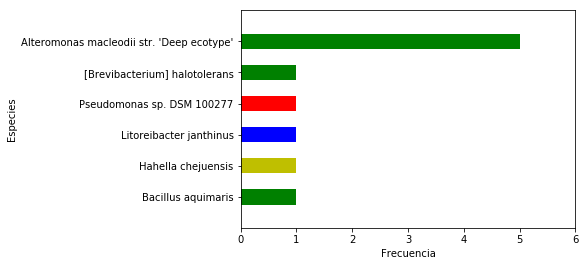

In [30]:
ftab2.plot(kind='barh', color=list('gybr'))
plt.axis([0, max (ftab1)+1, -1, len (ftab1.index)], label=None)
pylab.xlabel("Frecuencia")
pylab.ylabel("Especies")
plt.show()

### Si en vez de utilizar "sscinames" se usa "sblastnames". Para ello revise la base de datos obtenida del blast

In [31]:
ftab1= ftab.groupby("sblastnames")["qseqid"].count()
ftab1

sblastnames
a-proteobacteria    1
firmicutes          2
g-proteobacteria    7
Name: qseqid, dtype: int64

In [32]:
ftab2 = ftab1.sort_values(ascending=False)
ftab2


sblastnames
g-proteobacteria    7
firmicutes          2
a-proteobacteria    1
Name: qseqid, dtype: int64

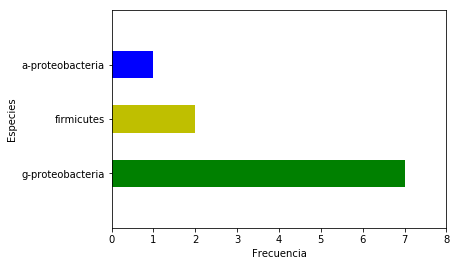

In [33]:
ftab2.plot(kind='barh', color=list('gybr'))
plt.axis([0, max (ftab1)+1, -1, len (ftab1.index)], label=None)
pylab.xlabel("Frecuencia")
pylab.ylabel("Especies")
plt.show()

## Procedimiento para asignar el nombre a las secuencias y crear un archivo fasta

In [34]:
from Bio import pairwise2, SeqIO
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.SeqRecord import SeqRecord


In [35]:
ftab

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,sskingdoms,stitle,staxids,sscinames,scomnames,sblastnames
0,Nav1_2,NR_115063.1,95.808,334,13,1,1,333,1187,1520,7.030000e-153,538,Bacteria,Bacillus halotolerans strain DSM 8802 16S ribo...,260554,[Brevibacterium] halotolerans,[Brevibacterium] halotolerans,firmicutes
1,Nav1_8,NR_025241.1,98.799,333,3,1,1,332,1173,1505,5.300000e-169,592,Bacteria,Bacillus aquimaris strain TF-12 16S ribosomal ...,189382,Bacillus aquimaris,Bacillus aquimaris,firmicutes
2,Nav2_2,NR_148756.1,100.000,333,0,0,1,333,1180,1512,3.160000e-176,616,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
3,PET1_2,NR_074812.1,97.598,333,8,0,1,333,1183,1515,6.930000e-163,571,Bacteria,Hahella chejuensis strain KCTC 2396 16S riboso...,158327,Hahella chejuensis,Hahella chejuensis,g-proteobacteria
4,PET1_8,NR_152090.1,100.000,318,0,0,1,318,1178,1495,6.880000e-168,588,Bacteria,Pseudomonas oceani strain DSM 100277 16S ribos...,1708783,Pseudomonas sp. DSM 100277,Pseudomonas sp. DSM 100277,g-proteobacteria
5,PET2_2,NR_148756.1,100.000,333,0,0,1,333,1180,1512,3.160000e-176,616,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
6,PET2_8,NR_148756.1,99.700,333,1,0,1,333,1180,1512,1.470000e-174,610,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
7,PETsn1_2,NR_148756.1,100.000,333,0,0,1,333,1180,1512,3.160000e-176,616,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
8,PETsn1_8,NR_148756.1,99.401,334,1,1,1,334,1180,1512,6.860000e-173,604,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
9,PHBb1_2,NR_112983.1,100.000,311,0,0,1,311,1117,1427,4.980000e-164,575,Bacteria,Litoreibacter janthinus strain KMM 3842 16S ri...,670154,Litoreibacter janthinus,Litoreibacter janthinus,a-proteobacteria


In [36]:
## Función para obtener la inicial del género y la especie para poderla agregar al "id" de la secuencia
def genesp(desc):
    genero1= desc[:1]
    genero2= desc[desc.find(" ")+1:]
    genero2= genero2[:genero2.find(" ")]
    gen_especie = genero1+ "_" +genero2
    return (gen_especie)

In [52]:
## Función para obtener la inicial del género para poderla agregar al "id" de la secuencia
def genero(desc):
    genero1= desc[:desc.find(" ")]
    genero2= desc[desc.find(" ")+1:]
    genero2= genero2[:genero2.find(" ")]
    genero1= genero1 + " " + genero2
    return (genero1)

In [57]:
f= open("secuencias_comp.fas", 'r')
f2= []
linea=''
n=0
n1=0
n2=1000  # para procesar todos n2=0, para procesar hasta un numero de secuencias dado, n2= numero deseado
for rec in SeqIO.parse(f, "fasta"):
    #print (rec.id, rec.description, rec.seq[0:50])
    nombre = rec.id
    row2=ftab.loc[ftab['qseqid']==nombre]
    
    try :
        row3_1= row2['qseqid'].values[0]
    except:
        n+=1
        n1+=1
    else:
        n+=1
        descripcion = row2["stitle"].values[0]
        nombre = rec.id+ "_" +genesp(descripcion)
        descripcion = genero(descripcion)
        linea = SeqRecord(rec.seq, id=nombre, description= (descripcion)) 
        f2.append(linea)
        print(linea.id, "\t" , linea.description)
        
    if n==n2:
        break
print (str(n)+" secuencias totales" +"\n" + "secuencias con anotacion: "+ str(n-n1))

Nav1_2_B_halotolerans 	 Bacillus halotolerans
Nav1_8_B_aquimaris 	 Bacillus aquimaris
Nav2_2_A_mediterranea 	 Alteromonas mediterranea
PET1_2_H_chejuensis 	 Hahella chejuensis
PET1_8_P_oceani 	 Pseudomonas oceani
PET2_2_A_mediterranea 	 Alteromonas mediterranea
PET2_8_A_mediterranea 	 Alteromonas mediterranea
PETsn1_2_A_mediterranea 	 Alteromonas mediterranea
PETsn1_8_A_mediterranea 	 Alteromonas mediterranea
PHBb1_2_L_janthinus 	 Litoreibacter janthinus
10 secuencias totales
secuencias con anotacion: 10


In [58]:
SeqIO.write(f2, 'secuencias_anotadas.fasta','fasta')

10

In [59]:
!head secuencias_anotadas.fasta

>Nav1_2_B_halotolerans Bacillus halotolerans
GACGTCAAATCATCATGCCCCTTATGACCTGGGGTACACACGTGGTACAATGGACAGAAC
AAAGGGCAGGGAAACCGGGAGGTTAAGCCAATTCCACAAATCTGTTTTCAGTTCGGATTG
CAGTTTGCAACTTGAATGCGTGAAGCTGGAATCGGTTGTAATTGCGGATCAGCATGCCGC
GGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCACGAGAGTTTGTAACAC
CCGAAGTCGGTGAGGTAACCTTTATGGAGCCAGCCGCCGAAGGTGGGACAGATGATTGGG
GGAAGTCGTAACAAGGTAGCCGTATCGGAAGGT
>Nav1_8_B_aquimaris Bacillus aquimaris
GACGTCAAATCATCATGCCCCTTATGACTTGGGCTACACACGTGCTACAATGGACGGTAC
AAAGGGCAGCAAGACCGCGAGGTTTAGCCAATCCCATAAAACCGTTCTCAGTTCGGATTG
